<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualziation with Python
The objective of this checkpoint is to analyze the 'Climate change in Africa' dataset by visualizing temperature fluctuations across five African countries from 1980 to 2023, focusing on specific tasks like plotting temperature trends, comparing histograms of temperature distributions, and determining the most effective chart for representing average temperatures per country.


Instructions

In this checkpoint, we are going to work on the 'Climate change in Africa' dataset that was provided by the U.S global change research program.

Dataset description : This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.

➡️ Dataset link

https://i.imgur.com/w2czdso.jpg

Load the dataset into a data frame using Python.
Clean the data as needed.
Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
Select the best chart to show the Average temperature per country.
Make your own questions about the dataset and try to answer them using the appropriate visuals.

## Loading the dataset

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Africa_climate_change.csv')

# Display the first few rows
print(df.head())

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon


## Step 2: Cleaning the data as needed

In [43]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing temperature values
df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)
df['TMAX'].fillna(df['TMAX'].mean(), inplace=True)
df['TAVG'].fillna(df['TAVG'].mean(), inplace=True)
df['PRCP'].fillna(0.0000, inplace=True)

# Convert 'Date' column to datetime format if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Check for unexpected country names
print(df['COUNTRY'].unique())

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64
['Tunisia' 'Cameroon' 'Senegal' 'Egypt' 'Angola']


<ipython-input-43-c72462ed5f14>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)
<ipython-input-43-c72462ed5f14>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [44]:
df.isnull().sum()

,0
DATE,0
PRCP,0
TAVG,0
TMAX,0
TMIN,0
COUNTRY,0


## Step 3: Plot a line chart showing average temperature fluctuations in Tunisia and Cameroon

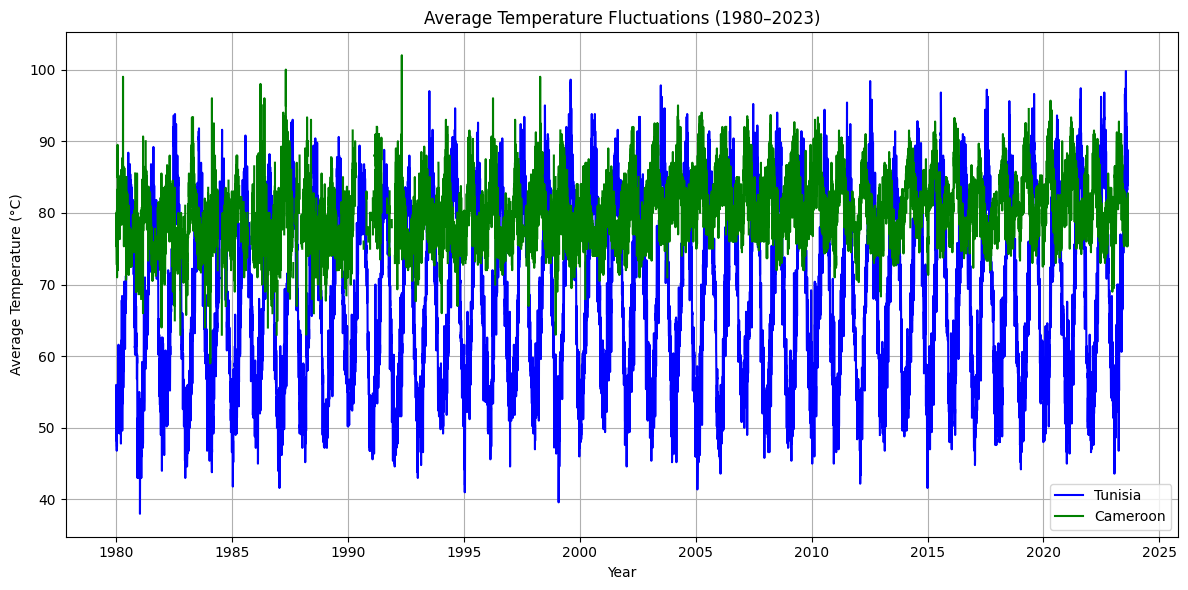

In [52]:
#loting a line chart of avg temp fluctuations in Tunisia and Cameroon
#
import matplotlib.pyplot as plt

# Use pivot_table instead of pivot to handle duplicates
pivot_data = tc_data.pivot_table(index='DATE', columns='COUNTRY', values='TAVG', aggfunc='mean')

# Filter data for Tunisia and Cameroon
tc_data = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

plt.figure(figsize=(12, 6))
plt.plot(pivot_data['Tunisia'], label='Tunisia', color='blue')
plt.plot(pivot_data['Cameroon'], label='Cameroon', color='green')
plt.title('Average Temperature Fluctuations (1980–2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Step 4: Zooming in to include data of upto 2005 only

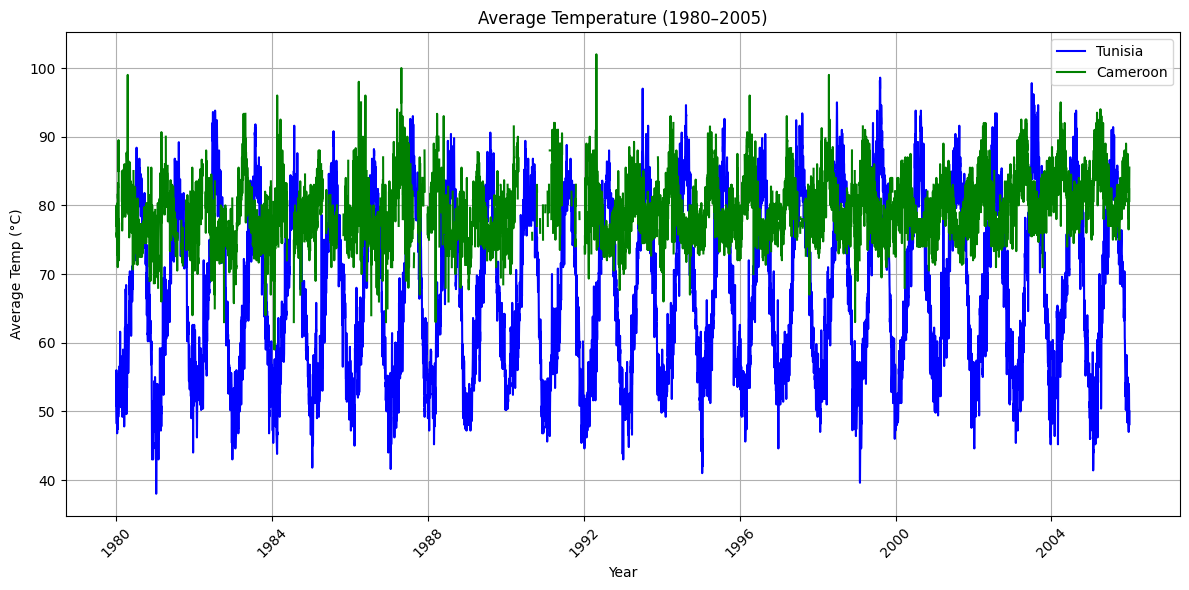

In [53]:
#zooming in for data between 1980 and 2005
#
# Filter date range
zoomed_data = pivot_data[(pivot_data.index >= '1980-01-01') & (pivot_data.index <= '2005-12-31')]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(zoomed_data['Tunisia'], label='Tunisia', color='blue')
plt.plot(zoomed_data['Cameroon'], label='Cameroon', color='green')
plt.title('Average Temperature (1980–2005)')
plt.xlabel('Year')
plt.ylabel('Average Temp (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 5: Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

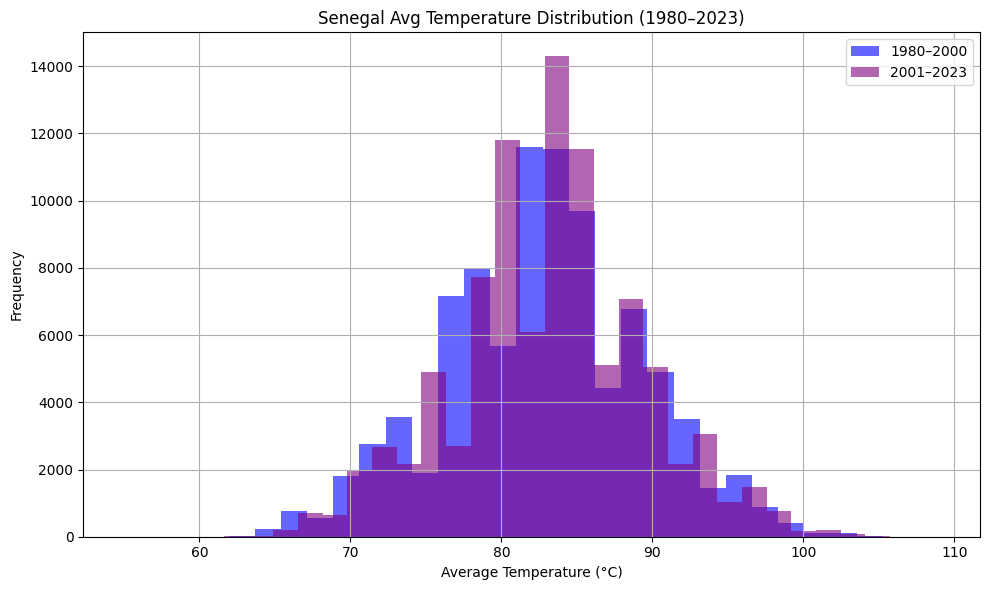

In [58]:
#creating an histogram to show temps distribution in senegal between 1980- 2000, and 2000-2003 in the same figure
#
# #filtering senegal data for the period
# df_senegal = df[(df['COUNTRY'] == 'Senegal') & (df['DATE'].between('1980-01-01', '2000-12-31'))]
# # split into two periods
# Filter data for Senegal
senegal_data = df[df['COUNTRY'] == 'Senegal']

# Split into two periods
senegal_early = senegal_data[(senegal_data['DATE'] >= '1980-01-01') & (senegal_data['DATE'] <= '2000-12-31')]
senegal_late = senegal_data[(senegal_data['DATE'] >= '2001-01-01') & (senegal_data['DATE'] <= '2023-12-31')]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(senegal_early['TAVG'], bins=30, alpha=0.6, label='1980–2000', color='blue')
plt.hist(senegal_late['TAVG'], bins=30, alpha=0.6, label='2001–2023', color='purple')
plt.title('Senegal Avg Temperature Distribution (1980–2023)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## step 6: Select the best chart to show the Average temperature per country.

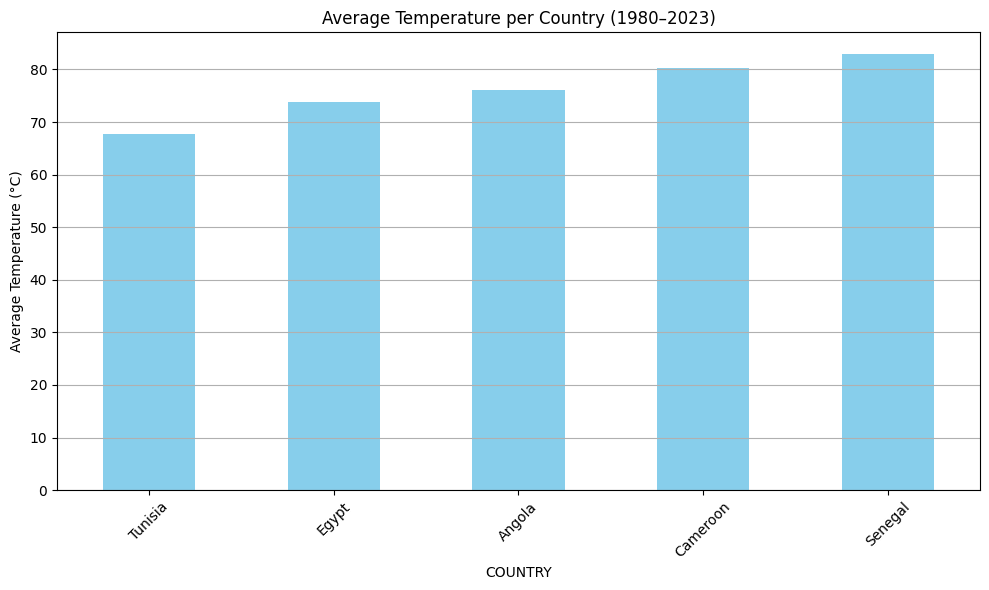

In [60]:
# selecting the best chart to show the average temperature per country
#
# Group by country and calculate mean temperature
avg_temp_country = df.groupby('COUNTRY')['TAVG'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
avg_temp_country.plot(kind='bar', color='skyblue')
plt.title('Average Temperature per Country (1980–2023)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Step 7: Framing explorative questions
Question 1: Which country has experienced the steepest increase in average temperature over the years?

findings
from the visualization, Cameroon has experienced the most steep changes in average tenperatures over the years. this could imply that Cameroon has the most fluctuating temperatures over the other countries presented

# QUESTION 2: seasonal trends in temperature trends in egypt
the findings indicate that the 6, 7 and 8th months are the hottest in Egypt.

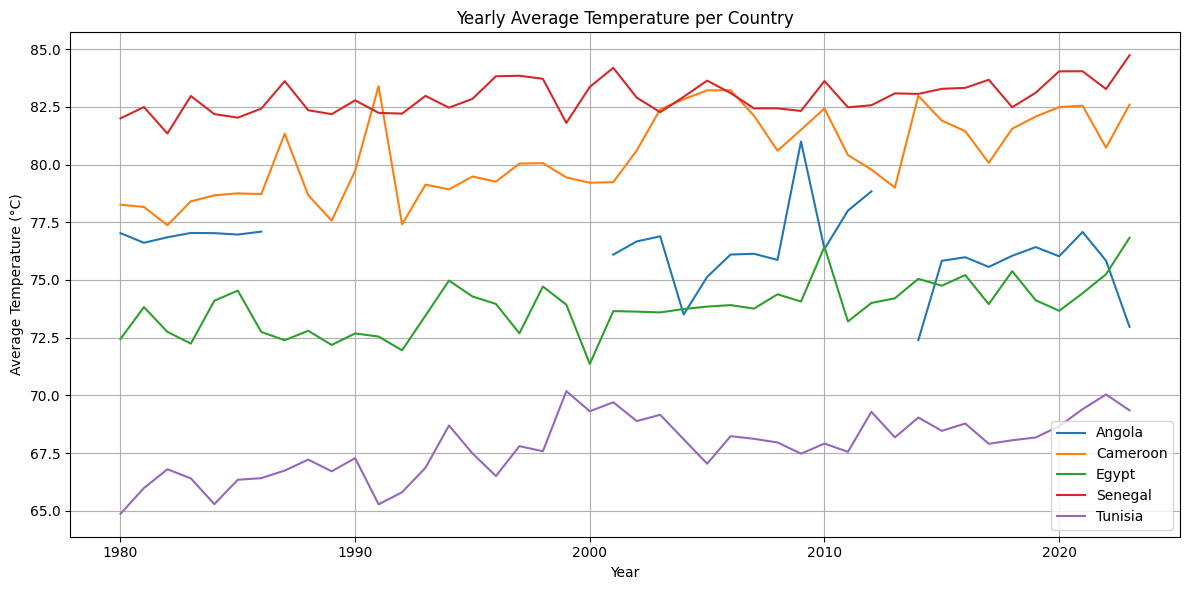

In [61]:
#country that has experienced the steppest increase in the avg temperature over the years
#
# Compute yearly average temperature per country
df['Year'] = df['DATE'].dt.year
yearly_avg = df.groupby(['Year', 'COUNTRY'])['TAVG'].mean().reset_index()

# Pivot for plotting
pivot_yearly = yearly_avg.pivot(index='Year', columns='COUNTRY', values='TAVG')

# Plot
plt.figure(figsize=(12, 6))
for country in pivot_yearly.columns:
    plt.plot(pivot_yearly.index, pivot_yearly[country], label=country)
plt.title('Yearly Average Temperature per Country')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


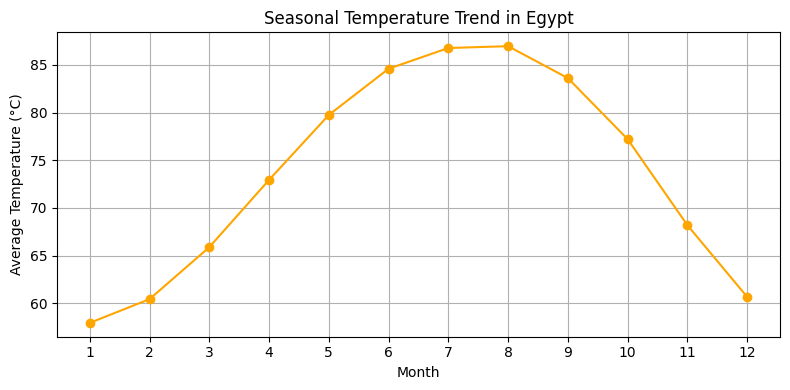

In [62]:
# QUESTION 2: seasonal trends in temperature trends in egypt
#
# Extract month
df['Month'] = df['DATE'].dt.month

# Filter for Egypt
egypt = df[df['COUNTRY'] == 'Egypt']

# Average temp per month
monthly_avg = egypt.groupby('Month')['TAVG'].mean()

# Plot
plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Temperature Trend in Egypt')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()